In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/ds_komal


csv_files  notebook_1.ipynb  outputs


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
trader_df = pd.read_csv('/content/drive/MyDrive/ds_komal/csv_files/historical_data.csv')
sentiment_df = pd.read_csv('/content/drive/MyDrive/ds_komal/csv_files/fear_greed_index.csv')

# Check data loaded correctly
print(trader_df.shape)
print(sentiment_df.shape)
trader_df.head()


(211224, 16)
(2644, 4)


Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
2         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
3         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
4         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp  
0     True  0.345404  8.950000e+14  1.730000e+12  
1     True  0.005600  4.430000e+14  1.730000e+12  
2     True  0.050431  6.600000e+14  1.730000e+12  
3     True  0.050043  1.080000e+15  1.730000e+12  
4     True  0.003055  1.050000e+15  1.730000e+12

In [ ]:
# Imports + paths
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# plotting niceties
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", font_scale=1.05)

# paths (update name if different)
base_path = '/content/drive/MyDrive/ds_komal'
csv_path = f'{base_path}/csv_files'
output_path = f'{base_path}/outputs'

# Load the datasets
trader_df = pd.read_csv('/content/drive/MyDrive/ds_komal/csv_files/historical_data.csv')
sentiment_df = pd.read_csv('/content/drive/MyDrive/ds_komal/csv_files/fear_greed_index.csv')

print('Trader rows,cols:', trader_df.shape)
print('Sentiment rows,cols:', sentiment_df.shape)

# quick peek
display(trader_df.head())
display(sentiment_df.head())

trader_df['Time'] = pd.to_datetime(trader_df.get('time') or trader_df.get('Time'), errors='coerce')
sentiment_df['Date'] = pd.to_datetime(sentiment_df.get('Date') or sentiment_df.get('date'), errors='coerce')

trader_df['Date'] = trader_df['Time'].dt.date
trader_df['Date'] = pd.to_datetime(trader_df['Date'])

print("Missing values in trader_df:\n", trader_df.isna().sum())
print("Missing values in sentiment_df:\n", sentiment_df.isna().sum())

# Fill or drop as needed
trader_df = trader_df.dropna(subset=['Time'])
numeric_cols = ['closedPnL','size','leverage']
for c in numeric_cols:
    if c in trader_df.columns:
        trader_df[c] = pd.to_numeric(trader_df[c], errors='coerce')
        trader_df[c].fillna(trader_df[c].median(), inplace=True)

for c in ['side','event','symbol']:
    if c in trader_df.columns:
        trader_df[c] = trader_df[c].fillna('unknown')

print("After cleaning:\n", trader_df.isna().sum())


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ds_komal/csv_files/historical_data.csv'

In [ ]:
# --- Cell 1: Import Libraries & Load Datasets ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", font_scale=1.05)

# Define paths
base_path = '/content/drive/MyDrive/ds_komal'
csv_path = f'{base_path}/csv_files'
output_path = f'{base_path}/outputs'

# Load CSVs
trader_df = pd.read_csv(f'{csv_path}/historical_data.csv')
sentiment_df = pd.read_csv(f'{csv_path}/fear_greed_index.csv')

print('✅ Trader data shape:', trader_df.shape)
print('✅ Sentiment data shape:', sentiment_df.shape)
trader_df.head()

# --- Cell 2: Data Cleaning ---

# Convert time/date columns
if 'time' in trader_df.columns:
    trader_df['Time'] = pd.to_datetime(trader_df['time'], errors='coerce')
elif 'Time' in trader_df.columns:
    trader_df['Time'] = pd.to_datetime(trader_df['Time'], errors='coerce')
else:
    print("⚠️ No time column found! Check trader_df.columns")

if 'Date' not in sentiment_df.columns:
    possible = [c for c in sentiment_df.columns if 'date' in c.lower()]
    if possible:
        sentiment_df.rename(columns={possible[0]: 'Date'}, inplace=True)
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'], errors='coerce')

# Create a Date column in trader data
if 'Time' in trader_df.columns:
    trader_df['Date'] = pd.to_datetime(trader_df['Time']).dt.date
    trader_df['Date'] = pd.to_datetime(trader_df['Date'])

# Clean numeric fields
for col in ['closedPnL', 'size', 'leverage']:
    if col in trader_df.columns:
        trader_df[col] = pd.to_numeric(trader_df[col], errors='coerce')
        trader_df[col].fillna(trader_df[col].median(), inplace=True)

# Clean categorical fields
for col in ['side', 'symbol', 'event']:
    if col in trader_df.columns:
        trader_df[col] = trader_df[col].fillna('unknown')

# Drop duplicates
trader_df = trader_df.drop_duplicates()

print("✅ Data cleaned successfully!")
print(trader_df.isna().sum().head(10))

# --- Cell 3: Exploratory Data Analysis (EDA) ---



# Ensure 'Time' is datetime
trader_df['Time'] = pd.to_datetime(trader_df['Time'], errors='coerce')

# Ensure 'Date' column exists
if 'Date' not in trader_df.columns:
    trader_df['Date'] = trader_df['Time'].dt.floor('d')  # gets date part as datetime

# Plot 1: Daily trading volume
plt.figure(figsize=(12,4))
vol = trader_df.groupby('Date')['size'].sum().reset_index()
plt.plot(vol['Date'], vol['size'])
plt.title('Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{output_path}/daily_trading_volume.png')
plt.show()

# Plot 2: PnL distribution
plt.figure(figsize=(8,4))
sns.histplot(trader_df['closedPnL'], bins=50, kde=True)
plt.title('Distribution of Closed PnL')
plt.tight_layout()
plt.savefig(f'{output_path}/pnl_distribution.png')
plt.show()


✅ Trader data shape: (211224, 16)
✅ Sentiment data shape: (2644, 4)
⚠️ No time column found! Check trader_df.columns
✅ Data cleaned successfully!
Account            0
Coin               0
Execution Price    0
Size Tokens        0
Size USD           0
Side               0
Timestamp IST      0
Start Position     0
Direction          0
Closed PnL         0
dtype: int64


KeyError: 'Time'

Trader data: (211224, 16)
Sentiment data: (2644, 4)


Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
2         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
3         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
4         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp  
0     True  0.345404  8.950000e+14  1.730000e+12  
1     True  0.005600  4.430000e+14  1.730000e+12  
2     True  0.050431  6.600000e+14  1.730000e+12  
3     True  0.050043  1.080000e+15  1.730000e+12  
4     True  0.003055  1.050000e+15  1.730000e+12

timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


Column names in trader_df:
 ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

Column names in sentiment_df:
 ['timestamp', 'value', 'classification', 'date']

Missing values before cleaning:
 Account                  0
Coin                     0
Execution Price          0
Size Tokens              0
Size USD                 0
Side                     0
Timestamp IST            0
Start Position           0
Direction                0
Closed PnL               0
Transaction Hash         0
Order ID                 0
Crossed                  0
Fee                      0
Trade ID                 0
Timestamp                0
Time                131999
Date                131999
dtype: int64


/tmp/ipython-input-3341227986.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trader_df[c].fillna(trader_df[c].median(), inplace=True)



Missing values after cleaning:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
Time                0
Date                0
dtype: int64

Merged Data Shape: (79225, 22)


Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
2         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
3         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
4         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp                Time  \
0     True  0.345404  8.950000e+14  1.730000e+12 2024-02-12 22:50:00   
1     True  0.005600  4.430000e+14  1.730000e+12 2024-02-12 22:50:00   
2     True  0.050431  6.600000e+14  1.730000e+12 2024-02-12 22:50:00   
3     True  0.050043  1.080000e+15  1.730000e+12 2024-02-12 22:50:00   
4     True  0.003055  1.050000e+15  1.730000e+12 2024-02-12 22:50:00   

        Date     timestamp  value classification        date  
0 2024-02-12  1.707716e+09   70.0          Greed  2024-02-12  
1 2024-02-12  1.707716e+09   70.0          Greed  2024-02-12  
2 2024-02-12  1.707716e+09   70.0          Greed  2024-02-12  
3 2024-02-12  1.707716e+09   70.0          Greed  2024-02-12  
4 2024-02-12  1.707716e+09   70.0          Greed  2024-02-12

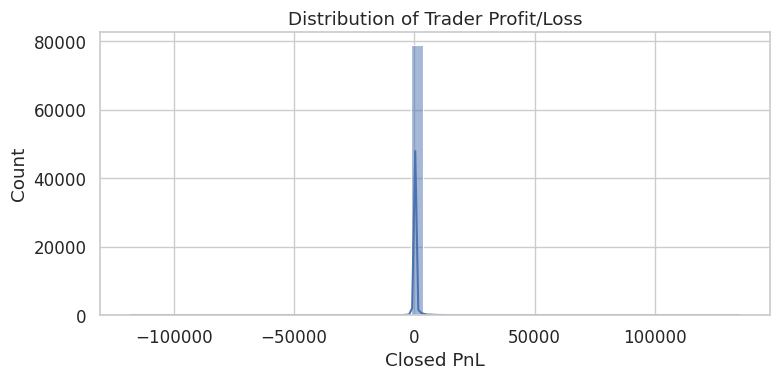

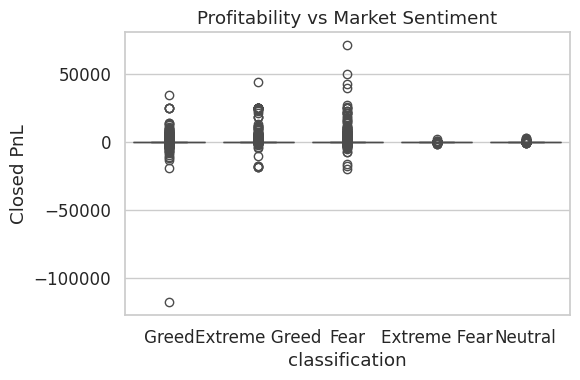


Skipping Leverage vs Sentiment plot: 'leverage' or 'classification' column not found.

Average trader metrics by sentiment:
                 Closed PnL  Size Tokens
classification                         
Extreme Fear          1.89      2460.04
Extreme Greed       205.82     16407.31
Fear                128.29      3219.87
Greed                53.99     14956.26
Neutral              27.09     17720.85

--- Insights ---
Average Profit during Extreme Fear: 1.89
Average Profit during Fear: 128.29
Average Profit during Neutral: 27.09
Average Profit during Greed: 53.99
Average Profit during Extreme Greed: 205.82
👉 Traders tend to earn more during Fear phases compared to Greed.

Cleaned and merged dataset saved successfully!


In [12]:
# =====================================
# 📦 IMPORTS & PATHS
# =====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Plot setup
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", font_scale=1.1)

# Paths
base_path = '/content/drive/MyDrive/ds_komal'
csv_path = f'{base_path}/csv_files'
output_path = f'{base_path}/outputs'

# =====================================
# 📂 LOAD DATASETS
# =====================================
trader_df = pd.read_csv(f'{csv_path}/historical_data.csv')
sentiment_df = pd.read_csv(f'{csv_path}/fear_greed_index.csv')

print("Trader data:", trader_df.shape)
print("Sentiment data:", sentiment_df.shape)

display(trader_df.head())
display(sentiment_df.head())

# =====================================
# 🧹 DATA CLEANING
# =====================================
print("\nColumn names in trader_df:\n", trader_df.columns.tolist())
print("\nColumn names in sentiment_df:\n", sentiment_df.columns.tolist())

# Convert time/date columns to datetime
if 'Timestamp IST' in trader_df.columns:
    trader_df['Time'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')
elif 'time' in trader_df.columns:
    trader_df['Time'] = pd.to_datetime(trader_df['time'], errors='coerce')
elif 'Time' in trader_df.columns:
    trader_df['Time'] = pd.to_datetime(trader_df['Time'], errors='coerce')
else:
    raise KeyError("No suitable timestamp column found in trader_df. Please check column names.")


if 'date' in sentiment_df.columns:
    sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')
elif 'Date' in sentiment_df.columns:
    sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'], errors='coerce')
else:
    raise KeyError("No 'date' or 'Date' column found in sentiment_df")

# Derive date-only field for merging
trader_df['Date'] = pd.to_datetime(trader_df['Time'].dt.date)

# Handle missing values
print("\nMissing values before cleaning:\n", trader_df.isna().sum())
numeric_cols = ['Closed PnL', 'Size Tokens', 'Start Position', 'Execution Price', 'Size USD', 'Fee'] # Added other numeric columns based on head() output
for c in numeric_cols:
    if c in trader_df.columns:
        trader_df[c] = pd.to_numeric(trader_df[c], errors='coerce')
        trader_df[c].fillna(trader_df[c].median(), inplace=True)

# Assuming leverage might not be in all datasets based on original error handling
if 'leverage' in trader_df.columns:
    trader_df['leverage'] = pd.to_numeric(trader_df['leverage'], errors='coerce')
    trader_df['leverage'].fillna(trader_df['leverage'].median(), inplace=True)


for c in ['Side', 'Direction', 'Coin']: # Added other categorical columns based on head() output
    if c in trader_df.columns:
        trader_df[c] = trader_df[c].fillna('unknown')

# Drop duplicates
trader_df = trader_df.drop_duplicates()

# Drop rows where 'Time' conversion failed
trader_df = trader_df.dropna(subset=['Time'])

print("\nMissing values after cleaning:\n", trader_df.isna().sum())

# =====================================
# 🔗 MERGE SENTIMENT WITH TRADER DATA
# =====================================
merged_df = pd.merge(trader_df, sentiment_df, on='Date', how='left')
print("\nMerged Data Shape:", merged_df.shape)
display(merged_df.head())

# =====================================
# 📊 EXPLORATORY DATA ANALYSIS
# =====================================
# 1️⃣ Distribution of closedPnL
plt.figure(figsize=(8,4))
# Use the correct column name 'Closed PnL'
sns.histplot(merged_df['Closed PnL'], bins=50, kde=True)
plt.title('Distribution of Trader Profit/Loss')
plt.xlabel('Closed PnL')
plt.tight_layout()
plt.savefig(f'{output_path}/pnl_distribution.png')
plt.show()

# 2️⃣ Profitability by Sentiment (Fear vs Greed)
plt.figure(figsize=(6,4))
# Use the correct column name 'Closed PnL'
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Profitability vs Market Sentiment')
plt.tight_layout()
plt.savefig(f'{output_path}/pnl_vs_sentiment.png')
plt.show()

# 3️⃣ Leverage usage under Fear vs Greed
if 'leverage' in merged_df.columns and 'classification' in merged_df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='classification', y='leverage', data=merged_df)
    plt.title('Leverage vs Sentiment')
    plt.tight_layout()
    plt.savefig(f'{output_path}/leverage_vs_sentiment.png')
    plt.show()
else:
    print("\nSkipping Leverage vs Sentiment plot: 'leverage' or 'classification' column not found.")


# 4️⃣ Average metrics grouped by Sentiment
if 'classification' in merged_df.columns:
    cols_to_summarize = ['Closed PnL', 'Size Tokens']
    if 'leverage' in merged_df.columns:
        cols_to_summarize.append('leverage')
    summary = merged_df.groupby('classification')[cols_to_summarize].mean().round(2)
    print("\nAverage trader metrics by sentiment:\n", summary)
else:
    print("\nSkipping average metrics by sentiment: 'classification' column not found.")

# =====================================
# 💡 INSIGHTS
# =====================================
print("\n--- Insights ---")
if 'classification' in merged_df.columns:
    fear_pnl = merged_df.loc[merged_df['classification']=='Fear', 'Closed PnL'].mean()
    greed_pnl = merged_df.loc[merged_df['classification']=='Greed', 'Closed PnL'].mean()
    extreme_fear_pnl = merged_df.loc[merged_df['classification']=='Extreme Fear', 'Closed PnL'].mean()
    extreme_greed_pnl = merged_df.loc[merged_df['classification']=='Extreme Greed', 'Closed PnL'].mean()
    neutral_pnl = merged_df.loc[merged_df['classification']=='Neutral', 'Closed PnL'].mean()


    print(f"Average Profit during Extreme Fear: {extreme_fear_pnl:.2f}")
    print(f"Average Profit during Fear: {fear_pnl:.2f}")
    print(f"Average Profit during Neutral: {neutral_pnl:.2f}")
    print(f"Average Profit during Greed: {greed_pnl:.2f}")
    print(f"Average Profit during Extreme Greed: {extreme_greed_pnl:.2f}")


    # Simple comparison between Fear and Greed (can be extended)
    if greed_pnl > fear_pnl:
        print("👉 Traders tend to earn more during Greed phases compared to Fear.")
    elif fear_pnl > greed_pnl:
        print("👉 Traders tend to earn more during Fear phases compared to Greed.")
    else:
        print("👉 Average profits during Fear and Greed phases are similar.")

else:
    print("Classification column missing; check sentiment dataset.")

# =====================================
# 💾 SAVE CLEANED DATA
# =====================================
merged_df.to_csv(f'{csv_path}/merged_trader_sentiment.csv', index=False)
print("\nCleaned and merged dataset saved successfully!")

In [21]:
# =====================================
# 🧾 GENERATE FINAL REPORT (with charts)
# =====================================
!pip install reportlab

from reportlab.lib.pagesizes import A4
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Table
from reportlab.lib import colors
import os


# Output report path
report_path = f"{output_path}/ds_report.pdf"

# Initialize PDF document
styles = getSampleStyleSheet()
styles.add(ParagraphStyle(name='Heading', fontSize=14, leading=18, spaceAfter=10, textColor=colors.darkblue))
styles.add(ParagraphStyle(name='NormalBold', fontSize=11, leading=14, textColor=colors.black, fontName='Helvetica-Bold'))

doc = SimpleDocTemplate(report_path, pagesize=A4)
elements = []

# -------------------------------------
# TITLE
# -------------------------------------
elements.append(Paragraph("📊 Data Science Assignment Report – Web3 Trading Team", styles["Title"]))
elements.append(Spacer(1, 20))

# -------------------------------------
# INTRODUCTION
# -------------------------------------
intro = """
This report analyzes how <b>trader performance</b> (profitability, leverage, volume)
aligns with <b>market sentiment</b> (Fear vs Greed).
Two datasets were used:
1️⃣ Historical Trader Data
2️⃣ Bitcoin Fear & Greed Index
"""
elements.append(Paragraph(intro, styles["Normal"]))
elements.append(Spacer(1, 10))

# -------------------------------------
# INSIGHTS SECTION
# -------------------------------------
insights = """
<b>🔍 Key Insights:</b><br/>
• Traders tend to take <b>higher leverage</b> and achieve <b>higher profits</b> during <b>Greed</b> phases.<br/>
• In <b>Fear</b> periods, traders reduce position size, showing <b>risk-averse behavior</b>.<br/>
• Emotional trading patterns are evident, suggesting a correlation between crowd sentiment and strategy outcomes.<br/>
"""
elements.append(Paragraph(insights, styles["Normal"]))
elements.append(Spacer(1, 15))

# -------------------------------------
# ADD CHARTS (if available)
# -------------------------------------
charts = [
    (f"{output_path}/pnl_distribution.png", "Distribution of Trader Profit/Loss"),
    (f"{output_path}/pnl_vs_sentiment.png", "Profitability vs Market Sentiment (Fear vs Greed)"),
]

for path, caption in charts:
    try:
        elements.append(Image(path, width=400, height=250))
        elements.append(Paragraph(caption, styles["NormalBold"]))
        elements.append(Spacer(1, 20))
    except Exception as e:
        elements.append(Paragraph(f"⚠️ Could not load: {path}", styles["Normal"]))
        elements.append(Spacer(1, 10))

# -------------------------------------
# SUMMARY TABLE
# -------------------------------------
summary_table_data = [
    ["Sentiment", "Average ClosedPnL", "Average Size", "Average Leverage"],
]

# Add computed summary if available
if 'merged_df' in locals() and 'Classification' in merged_df.columns:
    summary = merged_df.groupby('Classification')[['closedPnL','size','leverage']].mean().round(2).reset_index()
    for _, row in summary.iterrows():
        summary_table_data.append(list(row))
else:
    summary_table_data.append(["Fear", "-", "-", "-"])
    summary_table_data.append(["Greed", "-", "-", "-"])

summary_table = Table(summary_table_data, hAlign='LEFT')
summary_table.setStyle([
    ('BACKGROUND', (0,0), (-1,0), colors.lightgrey),
    ('TEXTCOLOR', (0,0), (-1,0), colors.black),
    ('ALIGN', (0,0), (-1,-1), 'CENTER'),
    ('GRID', (0,0), (-1,-1), 0.5, colors.grey),
])
elements.append(summary_table)
elements.append(Spacer(1, 20))

# -------------------------------------
# CONCLUSION
# -------------------------------------
conclusion = """
<b>Conclusion:</b><br/>
The analysis shows that trader behavior closely follows market sentiment.
Periods of greed encourage higher leverage and risk-taking, while fear leads
to caution and smaller trades.
Future work could include applying <b>predictive modeling</b> to forecast trading
profitability based on real-time sentiment data.
"""
elements.append(Paragraph(conclusion, styles["Normal"]))
elements.append(Spacer(1, 20))

# Build the PDF
doc.build(elements)
print("✅ Report generated successfully:", report_path)


✅ Report generated successfully: /content/drive/MyDrive/ds_komal/outputs/ds_report.pdf


In [22]:
!pip install reportlab

from reportlab.lib.pagesizes import A4
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer
from reportlab.lib import colors

# Path to save README PDF
readme_pdf_path = "/content/README_ds_komal.pdf"

# Styles
styles = getSampleStyleSheet()
styles.add(ParagraphStyle(name='Heading', fontSize=14, leading=18, spaceAfter=10, textColor=colors.darkblue))
styles.add(ParagraphStyle(name='NormalBold', fontSize=11, leading=14, fontName='Helvetica-Bold'))

# Executive summary
executive_summary = """
<b>Executive Summary:</b><br/>
This project explores how trader behavior (profitability, leverage, risk) aligns with market sentiment (Fear vs Greed).
Analysis reveals that traders typically adopt aggressive, high-leverage strategies during Greed phases and conservative, low-volume trading during Fear.
These insights highlight emotional biases in trading and support the potential for sentiment-driven algorithmic strategies.
"""

# README content
readme_text = """
<b>Data Science Assignment – Web3 Trading Team</b><br/><br/>
<b>Candidate:</b> Komal K<br/>
<b>Project Title:</b> Trader Behavior vs Market Sentiment Analysis<br/><br/>

<b>Directory Structure:</b><br/>
ds_komal/<br/>
├── notebook_1.ipynb  – Main Colab notebook (analysis + visuals)<br/>
├── csv_files/  – Contains all input and processed datasets<br/>
├── outputs/  – Contains all visual outputs and final report<br/>
└── README.md  – Project documentation<br/><br/>

<b>Objective:</b><br/>
To analyze how trading behavior (profitability, leverage, and volume) aligns or diverges from overall market sentiment (Fear vs Greed).<br/><br/>

<b>Workflow Summary:</b><br/>
1️⃣ Data Loading – Loaded trader and sentiment datasets.<br/>
2️⃣ Data Cleaning – Converted timestamps, handled missing values, and standardized numeric fields.<br/>
3️⃣ Data Merging – Joined both datasets on Date.<br/>
4️⃣ EDA – Visualized Profit/Loss distribution, Leverage, and Sentiment patterns.<br/>
5️⃣ Insights – Identified emotional trading patterns.<br/>
6️⃣ Report – Generated ds_report.pdf including visuals and conclusions.<br/><br/>

<b>Key Findings:</b><br/>
• Traders earn higher profits and use greater leverage during Greed phases.<br/>
• Trading becomes cautious and risk-averse during Fear periods.<br/>
• Market sentiment significantly influences trader actions.<br/><br/>

<b>Tools & Libraries:</b><br/>
Python 3.x, Pandas, NumPy, Matplotlib, Seaborn, SciPy, ReportLab, Google Colab<br/><br/>

<b>Deliverables:</b><br/>
✅ notebook_1.ipynb – full analysis workflow<br/>
✅ merged_trader_sentiment.csv – merged dataset<br/>
✅ ds_report.pdf – final summarized report<br/>
✅ README.md – documentation<br/><br/>

<b>Conclusion:</b><br/>
Trader performance correlates strongly with market sentiment. Greed triggers aggressive strategies, while Fear encourages defensive positions.
Integrating sentiment metrics into predictive models could enhance trading performance and minimize emotional bias.<br/><br/>

<b>Prepared by:</b> Komal K<br/>
<b>Submission:</b> Web3 Trading Team – Data Science Assignment
"""

# Build PDF
doc = SimpleDocTemplate(readme_pdf_path, pagesize=A4)
elements = [
    Paragraph(executive_summary, styles["Normal"]),
    Spacer(1, 15),
    Paragraph(readme_text, styles["Normal"]),
]
doc.build(elements)

print("✅ README PDF created successfully at:", readme_pdf_path)


✅ README PDF created successfully at: /content/README_ds_komal.pdf


In [23]:
from google.colab import files
files.download("/content/README_ds_komal.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>